#ML Intermediate Project on Gender Recognition

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Preprocessing the data](#section3)<br>
  - 3.1 [Understanding the data](#section301)<br>
4. [Exploratory Data Analysis](#section4)<br>
  - 4.1 [Correlation between all independent attributes](#section401)<br>
  - 4.2 [Correlation between selected independent attributes](#section402)<br>
  - 4.3 [Checking the balance between the two classes](#section403)<br>
  - 4.4 [Convert the categorical target variable into number](#section404)<br>
5. [Model Building](#section5)<br>
  - 5.1 [Split the data for training and testing](#section501)<br>
  - 5.2 [Applying Standard Scaling Method](#section502)<br>
  - 5.3 [Programming Constructs for Model Building Pipeline](#section503)<br>
  - 5.4 [Build a Logistic Regression Model](#section504)<br>
  - 5.5 [Build a Gaussian Naive Bayes Model](#section505)<br>
  - 5.6 [Build a Random Forrest Classifier Model](#section506)<br>
  - 5.7 [Build a K Neighbors Classifier Model](#section507)<br>
  - 5.8 [Build a SVM Classifier Model](#section508)<br>
  - 5.9 [Try out Stratified K fold CV](#section509)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a>
## 1. Problem Statement

We have to look into the **Gender Recognition by Voice** dataset, created to identify a voice as **male or female**, based upon **acoustic properties** of the voice and speech. The objective shall be to understand the **trends and pattern** in the data first. Then we are expected to train **binary classification** models in order to **predict the correct class** of an instance from the dataset. We must use appropriate **evaluation metrics** to judge the **performance of our model**.

<a id=section2></a>
## 2. Data Loading and Description

- The dataset consists of **3,168** recorded **voice samples**, collected from **male** and **female speakers**.
- The following **acoustic properties** of each voice are measured and included within the CSV

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| meanfreq          | mean frequency (in kHz)      | 
| sd            | standard deviation of frequency |  
| median      | median frequency (in kHz) | 
| Q25	   | first quantile (in kHz)  |   
| Q75      | third quantile (in kHz)|
| IQR      | interquantile range (in kHz)  |
| skew      | skewness (see note in specprop description) |
| kurt         | kurtosis (see note in specprop description)|
| sp.ent    | spectral entropy |
| sfm       | spectral flatness                                          |
| mode       | mode frequency                                          |
| centroid       | frequency centroid (see specprop)                                          |
| peakf       | peak frequency (frequency with highest energy)                                          |
| meanfun       | average of fundamental frequency measured across acoustic signal                                          |
| minfun       | minimum fundamental frequency measured across acoustic signal                                          |
| maxfun       | maximum fundamental frequency measured across acoustic signal                                          |
| meandom       | average of dominant frequency measured across acoustic signal                                          |
| mindom       | minimum of dominant frequency measured across acoustic signal                                          |
| maxdom       | maximum of dominant frequency measured across acoustic signal                                          |
| dfrange       | range of dominant frequency measured across acoustic signal                                          |
| modindx       | modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range   |
| label       | male or female |

__Import Packages__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

__Import the Dataset__

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<a id=section3></a>
## 3. Preprocessing the data

<a id=section301></a>
### 3.1 Understanding the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

From the **info()** method, we find that there are **no missing values**. Otherthan the **target variable** column (i.e. **label**), all the rest of the columns have datatype as **float**. Hence all **not-null** values are **valid** values, as the columns contain **real** numbers. <br>
So we can safely say that the given dataset contains **no missing values**.

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


**Observations from describe():**

1.   Columns that have **negligible skew**: meanfreq, sd, median, Q25, Q75, sp.ent, sfm, centroid, meanfun, minfun, maxfun, maxdom, dfrange
2.   Columns that have **slight left skew**: IQR, mode 
3.   Columns that have **slight right skew**: meandom, mindom, modindx
4.   Columns that have **highly right skew**: skew, kurt










<a id=section4></a>
## 4. Exploratory Data Analysis

<a id=section401></a>
### 4.1 Correlation between all independent attributes

Text(0.5, 1.0, 'Correlation between features')

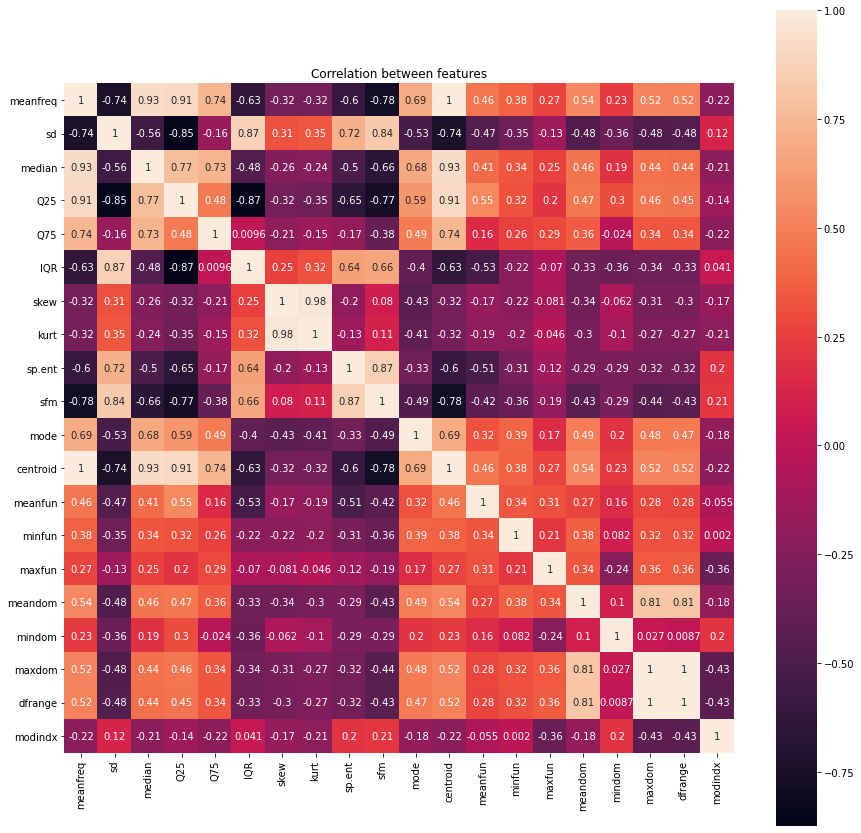

In [ ]:
# For all explanatory variables we check the correlation amongst them. Idea is to remove highly correlated ones.
df_corr = df.loc[:,df.columns!='label'].corr() # Only for the independent columns we apply the method corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, square = True, annot = True) # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

- Column **sd** has a high correlation of **-0.85** with column **Q25**
- Column **IQR** has a high correlation of **-0.87** with column **Q25**
- Column **sfm** has a high correlation of **0.87** with column **sp.ent**
- Column **median** has a high correlation of **0.93** with column **centroid**
- Column **Q25** has a high correlation of **0.91** with column **centroid**
- Column **kurt** has exceptionally high correlation of **0.98** with column **skew**
- Column **meanfreq** has exceptionally high correlation of **1** with column **centroid**
- Column **dfrange** has exceptionally high correlation of **1** with column **maxdom**

The below columns are identified to be associated with very high correlation of **0.85 and greater** or **-0.85 and lesser**.


*   sd
*   IQR
*   median
*   centroid
*   kurt
*   dfrange
*   sfm
*   meanfreq









<a id=section402></a>
### 4.2 Correlation between selected independent attributes

Text(0.5, 1.0, 'Correlation between features')

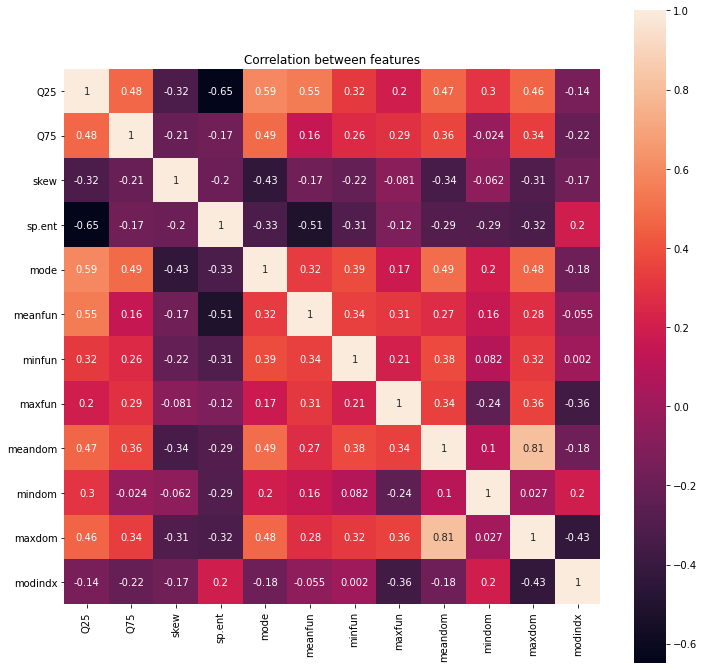

In [ ]:
# Drop all the explanatory variables that are highly correlated and verify using heatmap on output of corr()
df_drop = df.copy() # Create copy of original dataframe

df_drop.drop(['sd','IQR','median','centroid','kurt','dfrange','sfm','meanfreq'], axis=1, inplace=True) # Highly correlated columns are dropped
df_drop_corr = df_drop.loc[:,df_drop.columns!='label'].corr() # Only for the independent columns we apply the method corr()

plt.figure(figsize=(12,12))
sns.heatmap(df_drop_corr, square = True, annot = True) # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

Clearly, after removing the highly correlated columns, the heatmap shows only correlation values between **-0.84 and +0.84**. <br>
We can go ahead with the next steps.

<a id=section403></a>
### 4.3 Checking the balance between the two classes

In [ ]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

- We find that the dataset is **equally divided** between the two classes, **male** and **female**.
- Hence the dataset is a **perfectly balanced dataset**.

In [ ]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Above code double checks that there are **no null values** present in the dataset.

__Distribution of each class__

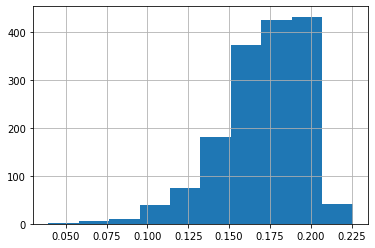

In [ ]:
df[df['label']=='male']['meanfreq'].hist()

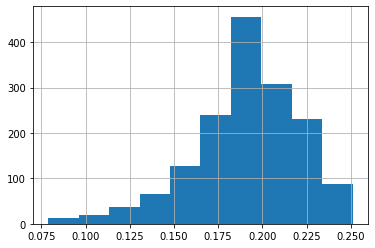

In [ ]:
df[df['label']=='female']['meanfreq'].hist()

- The distribution for the class **female** is closer to a **normal distribution** when compared with the class **male**.

<a id=section404></a>
### 4.4 Convert the categorical target variable into number

In [ ]:
df_ohe = pd.get_dummies(df_drop, drop_first=True) # Applying One-Hot Encoding using the get_dummies() method
df_ohe.head()

,Q25,Q75,skew,sp.ent,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label_male
0,0.015071,0.090193,12.863462,0.893369,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,1
1,0.019414,0.092666,22.423285,0.892193,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,1
2,0.008701,0.131908,30.757155,0.846389,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,1
3,0.096582,0.207955,1.232831,0.963322,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,1
4,0.078720,0.206045,1.101174,0.971955,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,1


<a id=section5></a>
## 5. Model Building

<a id=section501></a>
### 5.1 Split the data for training and testing

In [ ]:
# Create the explanatory variable specific dataframe X and target variable specific dataframe Y
y = df_ohe.iloc[:,-1]
print(y.shape)
X = df_ohe.iloc[:,:-1]
print(X.shape)

(3168,)
(3168, 12)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [ ]:
# Check the shape (dimensions) of X_train, X_test, y_train, y_test
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (2376, 12)
y_train shape:  (2376,)

Test cases as below
X_test shape:  (792, 12)
y_test shape:  (792,)


<a id=section502></a>
### 5.2 Applying Standard Scaling Method

In [ ]:
# Scaling is applied on train and test data separately, to prevent data leakage
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
print(X_train.head())
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
print(X_test.head())

        Q25       Q75      skew  ...    mindom    maxdom   modindx
0 -0.082791  0.767534 -0.358492  ... -0.455043  1.256257 -0.378815
1 -0.438141  0.307608 -0.296947  ... -0.455043  0.459031 -0.691288
2  1.772118  1.086837  0.104959  ...  3.010515 -1.062342 -0.784865
3 -0.808469 -0.202440  0.329144  ... -0.702583 -1.361302  0.220263
4 -0.574506  0.004635 -0.538952  ... -0.455043  0.279655 -0.424789

[5 rows x 12 columns]
        Q25       Q75      skew  ...    mindom    maxdom   modindx
0 -1.677305 -0.437776 -0.356867  ... -0.480946 -0.444499  0.307761
1  0.077302 -0.512507 -0.112316  ...  1.295469 -1.087343  2.007035
2 -0.226530  0.678898  0.095155  ...  2.336817  0.475524 -0.279890
3 -0.926305 -0.386146 -0.021891  ... -0.480946  0.792620 -0.714831
4 -0.063566  0.548542 -0.260743  ... -0.480946 -0.138569 -0.583174

[5 rows x 12 columns]


<a id=section503></a>
### 5.3 Programming Constructs for Model Building Pipeline

__DataFrame to Capture Model Statistics__

In [ ]:
df_model_stats = pd.DataFrame(index=['Accuracy Train','Accuracy Test','Precision Train','Precision Test','Recall Train','Recall Test','F1 Train','F1 Test'])
print(df_model_stats)

Empty DataFrame
Columns: []
Index: [Accuracy Train, Accuracy Test, Precision Train, Precision Test, Recall Train, Recall Test, F1 Train, F1 Test]


__Define Functions for Modelling__

In [ ]:
c = 1

In [ ]:
def run_model(model, X_train, y_train):
  print('Model :\n', model)
  # print('Model :\n', str(model).split('(')[0])
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  # df_model_stats[str(model).split('(')[0]] = [y_pred_train, y_pred_test]
  return y_pred_train, y_pred_test

In [ ]:
def evaluate_model(model, y_train, y_test, y_pred_train, y_pred_test):
  global c

  accuracy_score_train = accuracy_score(y_train,y_pred_train)
  accuracy_score_test = accuracy_score(y_test,y_pred_test)

  print('\nAccuracy score for train data is:', accuracy_score_train)
  print('Accuracy score for test data is:', accuracy_score_test)

  precision_score_train = precision_score(y_train,y_pred_train)
  precision_score_test = precision_score(y_test,y_pred_test)
  
  print('\nPrecision score for train data:', precision_score_train)
  print('Precision score for test data:', precision_score_test)

  recall_score_train = recall_score(y_train,y_pred_train)
  recall_score_test = recall_score(y_test,y_pred_test)

  print('\nRecall score for train data:', recall_score_train)
  print('Recall score for test data:', recall_score_test)

  f1_score_train = f1_score(y_train,y_pred_train)
  f1_score_test = f1_score(y_test,y_pred_test)

  print('\nF1 score for train data:', f1_score_train)
  print('F1 score for test data:', f1_score_test)

  if c%2 == 0:
    column_name = df_model_stats.columns[c-2]+'GSCV'
  else:
    column_name = str(model).split('(')[0]

  df_model_stats[column_name] = [accuracy_score_train,accuracy_score_test,precision_score_train,precision_score_test,recall_score_train,recall_score_test,f1_score_train,f1_score_test]

  print('\nTrain-set confusion matrix:\n', pd.DataFrame(confusion_matrix(y_train,y_pred_train), index=['Actual Female', 'Actual Male'], columns=['Predicted Female', 'Predicted Male']))
  print('\nTest-set confusion matrix:\n', pd.DataFrame(confusion_matrix(y_test,y_pred_test), index=['Actual Female', 'Actual Male'], columns=['Predicted Female', 'Predicted Male']))

  y_pred_test_prob = model.predict_proba(X_test)
  print(f"\nROC AUC: {roc_auc_score(y_test, y_pred_test_prob[:,1])}")

  c=c+1

  return

<a id=section504></a>
### 5.4 Build a Logistic Regression Model

__Build a simple model__

In [ ]:
model_logReg = LogisticRegression() # Instantiate a model
%time
y_pred_train, y_pred_test = run_model(model_logReg, X_train, y_train) # Invoke method to train the model and predict the target variable
%time
evaluate_model(model_logReg, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs
Model :
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 7.87 µs

Accuracy score for train data is: 0.9730639730639731
Accuracy score for test data is: 0.9709595959595959

Precision score for train data: 0.9683333333333334
Precision score for test data: 0.9674185463659147

Recall score for train data: 0.9781144781144782
Recall score for test data: 0.9747474747474747

F1 score for train data: 0.9731993299832495
F1 score for test data: 0.971069182389937

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1150              38
Actual Male     

__Hyperparameter Tuning - Search for a better Model__

In [ ]:
# Define a dictionary, comprising of some hyperparameter and their respective ranges for searching the best values
param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':np.arange(0, 3, 0.5),
              'fit_intercept':['True','False'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model_logReg0 = LogisticRegression() # Instantiate a model from LogisticRegression
model_logRegGDCV = GridSearchCV(model_logReg0, param_grid, cv = 10) # Instantiate Grid Search Cross Validation with cv = 10

model_logRegGDCV.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: invalid literal for int() with base 10: 'False'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: invalid literal for int() with base 10: 'False'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: invalid literal for int() with base 10: 'False'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_val

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
                         'fit_intercept': ['True', 'False'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch

In [ ]:
# Display the best set of hyperparameter vales and the best score
print("Tuned Logistic Regression Parameters: {}".format(model_logRegGDCV.best_params_))  
print("Best score is {}".format(model_logRegGDCV.best_score_))

Tuned Logistic Regression Parameters: {'C': 1.0, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 0.9713842499024926


In [ ]:
# Prediction using the hyperparameter tuned model
y_pred_train = model_logRegGDCV.predict(X_train)
y_pred_test = model_logRegGDCV.predict(X_test)

evaluate_model(model_logRegGDCV, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem


Accuracy score for train data is: 0.9739057239057239
Accuracy score for test data is: 0.9722222222222222

Precision score for train data: 0.9691666666666666
Precision score for test data: 0.9675

Recall score for train data: 0.9789562289562289
Recall score for test data: 0.9772727272727273

F1 score for train data: 0.974036850921273
F1 score for test data: 0.9723618090452262

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1151              37
Actual Male                  25            1163

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               383              13
Actual Male                   9             387

ROC AUC: 0.9969645954494439


In [ ]:
df_model_stats # Display the model evaluation metric stats for the models built so far

,LogisticRegression,LogisticRegressionGSCV
Accuracy Train,0.973064,0.973906
Accuracy Test,0.970960,0.972222
Precision Train,0.968333,0.969167
Precision Test,0.967419,0.967500
Recall Train,0.978114,0.978956
Recall Test,0.974747,0.977273
F1 Train,0.973199,0.974037
F1 Test,0.971069,0.972362


<a id=section505></a>
### 5.5 Build a Gaussian Naive Bayes Model

__Build a simple model__

In [ ]:
model_NB = GaussianNB() # Instantiate a model
%time
y_pred_train, y_pred_test = run_model(model_NB, X_train, y_train) # Invoke method to train the model and predict the target variable
%time
evaluate_model(model_NB, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 6.91 µs
Model :
 GaussianNB(priors=None, var_smoothing=1e-09)
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs

Accuracy score for train data is: 0.9061447811447811
Accuracy score for test data is: 0.9027777777777778

Precision score for train data: 0.9051217464315701
Precision score for test data: 0.8957816377171216

Recall score for train data: 0.9074074074074074
Recall score for test data: 0.9116161616161617

F1 score for train data: 0.9062631357713324
F1 score for test data: 0.9036295369211514

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1075             113
Actual Male                 110            1078

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               354              42
Actual Male                  35             361

ROC AUC: 0.9573959289868381


__Hyperparameter Tuning - Search for a better Model__

In [ ]:
# Define a dictionary, comprising of some hyperparameter and their respective ranges for searching the best values
param_grid = {'var_smoothing':[1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12]}

model_NB0 = GaussianNB() # Instantiate a model from GaussianNB
model_NBGDCV = GridSearchCV(model_NB0, param_grid, cv = 10) # Instantiate Grid Search Cross Validation with cv = 10

model_NBGDCV.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Display the best set of hyperparameter vales and the best score
print("Tuned Gaussian Naive Bayes Parameters: {}".format(model_NBGDCV.best_params_))  
print("Best score is {}".format(model_NBGDCV.best_score_))

Tuned Gaussian Naive Bayes Parameters: {'var_smoothing': 1e-07}
Best score is 0.9057440697798107


In [ ]:
# Prediction using the hyperparameter tuned model
y_pred_train = model_NBGDCV.predict(X_train)
y_pred_test = model_NBGDCV.predict(X_test)

evaluate_model(model_NBGDCV, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem


Accuracy score for train data is: 0.9061447811447811
Accuracy score for test data is: 0.9027777777777778

Precision score for train data: 0.9051217464315701
Precision score for test data: 0.8957816377171216

Recall score for train data: 0.9074074074074074
Recall score for test data: 0.9116161616161617

F1 score for train data: 0.9062631357713324
F1 score for test data: 0.9036295369211514

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1075             113
Actual Male                 110            1078

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               354              42
Actual Male                  35             361

ROC AUC: 0.9573959289868381


In [ ]:
df_model_stats # Display the model evaluation metric stats for the models built so far

,LogisticRegression,LogisticRegressionGSCV,GaussianNB,GaussianNBGSCV
Accuracy Train,0.973064,0.973906,0.906145,0.906145
Accuracy Test,0.970960,0.972222,0.902778,0.902778
Precision Train,0.968333,0.969167,0.905122,0.905122
Precision Test,0.967419,0.967500,0.895782,0.895782
Recall Train,0.978114,0.978956,0.907407,0.907407
Recall Test,0.974747,0.977273,0.911616,0.911616
F1 Train,0.973199,0.974037,0.906263,0.906263
F1 Test,0.971069,0.972362,0.903630,0.903630


<a id=section506></a>
### 5.6 Build a Random Forrest Classifier Model

__Build a simple model__

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=50, max_features='log2' , max_depth=8, random_state=0) # Instantiate a model
%time
y_pred_train, y_pred_test = run_model(model_rfc, X_train, y_train) # Invoke method to train the model and predict the target variable
%time
evaluate_model(model_rfc, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs
Model :
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs

Accuracy score for train data is: 0.9987373737373737
Accuracy score for test data is: 0.9810606060606061

Precision score for train data: 0.9991575400168492
Precision score for test data: 0.9798488664987406

Recall score for train data: 0.9983164983164983
Recall score for test data: 0.9823232323232324

F1 score for t

__Hyperparameter Tuning - Search for a better Model__

In [ ]:
# Define a dictionary, comprising of some hyperparameter and their respective ranges for searching the best values
param_grid = {'n_estimators':[i for i in range(30,71)],
              'criterion':['gini','entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'bootstrap':['True','False'],
              'random_state':[0]}

model_rfc0 = RandomForestClassifier() # Instantiate a model from RandomForestClassifier
model_rfcGDCV = GridSearchCV(model_rfc0, param_grid, cv = 10) # Instantiate Grid Search Cross Validation with cv = 10

model_rfcGDCV.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': ['True', 'False'],
          

In [ ]:
# Display the best set of hyperparameter vales and the best score
print("Tuned Random Forrest Parameters: {}".format(model_rfcGDCV.best_params_))  
print("Best score is {}".format(model_rfcGDCV.best_score_))

Tuned Random Forrest Parameters: {'bootstrap': 'True', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 35, 'random_state': 0}
Best score is 0.9768535262206148


In [ ]:
# Prediction using the hyperparameter tuned model
y_pred_train = model_rfcGDCV.predict(X_train)
y_pred_test = model_rfcGDCV.predict(X_test)

evaluate_model(model_rfcGDCV, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem


Accuracy score for train data is: 1.0
Accuracy score for test data is: 0.9797979797979798

Precision score for train data: 1.0
Precision score for test data: 0.9822335025380711

Recall score for train data: 1.0
Recall score for test data: 0.9772727272727273

F1 score for train data: 1.0
F1 score for test data: 0.979746835443038

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1188               0
Actual Male                   0            1188

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               389               7
Actual Male                   9             387

ROC AUC: 0.9983770788695031


In [ ]:
df_model_stats # Display the model evaluation metric stats for the models built so far

,LogisticRegression,LogisticRegressionGSCV,GaussianNB,GaussianNBGSCV,RandomForestClassifier,RandomForestClassifierGSCV
Accuracy Train,0.973064,0.973906,0.906145,0.906145,0.998737,1.000000
Accuracy Test,0.970960,0.972222,0.902778,0.902778,0.981061,0.979798
Precision Train,0.968333,0.969167,0.905122,0.905122,0.999158,1.000000
Precision Test,0.967419,0.967500,0.895782,0.895782,0.979849,0.982234
Recall Train,0.978114,0.978956,0.907407,0.907407,0.998316,1.000000
Recall Test,0.974747,0.977273,0.911616,0.911616,0.982323,0.977273
F1 Train,0.973199,0.974037,0.906263,0.906263,0.998737,1.000000
F1 Test,0.971069,0.972362,0.903630,0.903630,0.981084,0.979747


<a id=section507></a>
### 5.7 Build a K Neighbors Classifier Model

__Build a simple model__

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3, p=1) # Instantiate a model
%time
y_pred_train, y_pred_test = run_model(model_knn, X_train, y_train) # Invoke method to train the model and predict the target variable
%time
evaluate_model(model_knn, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Model :
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs

Accuracy score for train data is: 0.9873737373737373
Accuracy score for test data is: 0.9886363636363636

Precision score for train data: 0.9849246231155779
Precision score for test data: 0.9874055415617129

Recall score for train data: 0.98989898989899
Recall score for test data: 0.98989898989899

F1 score for train data: 0.9874055415617129
F1 score for test data: 0.9886506935687265

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1170              18
Actual Male                  12            1176

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               391      

__Hyperparameter Tuning - Search for a better Model__

In [ ]:
# Define a dictionary, comprising of some hyperparameter and their respective ranges for searching the best values
param_grid = {'n_neighbors':[i for i in range(2,10)],
              'p':[1,2,3]}

model_knn0 = KNeighborsClassifier() # Instantiate a model from KNeighborsClassifier
model_knnGDCV = GridSearchCV(model_knn0, param_grid, cv = 10) # Instantiate Grid Search Cross Validation with cv = 10

model_knnGDCV.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Display the best set of hyperparameter vales and the best score
print("Tuned K Neighbours Classifier Parameters: {}".format(model_knnGDCV.best_params_))  
print("Best score is {}".format(model_knnGDCV.best_score_))

Tuned K Neighbours Classifier Parameters: {'n_neighbors': 6, 'p': 1}
Best score is 0.9776885437719391


In [ ]:
# Prediction using the hyperparameter tuned model
y_pred_train = model_knnGDCV.predict(X_train)
y_pred_test = model_knnGDCV.predict(X_test)

evaluate_model(model_knnGDCV, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem


Accuracy score for train data is: 0.9823232323232324
Accuracy score for test data is: 0.9886363636363636

Precision score for train data: 0.9847715736040609
Precision score for test data: 0.9874055415617129

Recall score for train data: 0.9797979797979798
Recall score for test data: 0.98989898989899

F1 score for train data: 0.9822784810126582
F1 score for test data: 0.9886506935687265

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1170              18
Actual Male                  24            1164

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               391               5
Actual Male                   4             392

ROC AUC: 0.9981475104581164


In [ ]:
df_model_stats # Display the model evaluation metric stats for the models built so far

,LogisticRegression,LogisticRegressionGSCV,GaussianNB,GaussianNBGSCV,RandomForestClassifier,RandomForestClassifierGSCV,KNeighborsClassifier,KNeighborsClassifierGSCV
Accuracy Train,0.973064,0.973906,0.906145,0.906145,0.998737,1.000000,0.987374,0.982323
Accuracy Test,0.970960,0.972222,0.902778,0.902778,0.981061,0.979798,0.988636,0.988636
Precision Train,0.968333,0.969167,0.905122,0.905122,0.999158,1.000000,0.984925,0.984772
Precision Test,0.967419,0.967500,0.895782,0.895782,0.979849,0.982234,0.987406,0.987406
Recall Train,0.978114,0.978956,0.907407,0.907407,0.998316,1.000000,0.989899,0.979798
Recall Test,0.974747,0.977273,0.911616,0.911616,0.982323,0.977273,0.989899,0.989899
F1 Train,0.973199,0.974037,0.906263,0.906263,0.998737,1.000000,0.987406,0.982278
F1 Test,0.971069,0.972362,0.903630,0.903630,0.981084,0.979747,0.988651,0.988651


<a id=section508></a>
### 5.8 Build a SVM Classifier Model

__Build a simple model__

In [ ]:
model_svm = svm.SVC(kernel='rbf', C=4, gamma=0.1, probability=True) # Instantiate a model
%time
y_pred_train, y_pred_test = run_model(model_svm, X_train, y_train) # Invoke method to train the model and predict the target variable
%time
evaluate_model(model_svm, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Model :
 SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs

Accuracy score for train data is: 0.9890572390572391
Accuracy score for test data is: 0.9848484848484849

Precision score for train data: 0.9915397631133672
Precision score for test data: 0.9824120603015075

Recall score for train data: 0.9865319865319865
Recall score for test data: 0.9873737373737373

F1 score for train data: 0.9890295358649789
F1 score for test data: 0.9848866498740554

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1178              10
Actual Male                  16            1172

Test-set confusion matrix:
                Predicted 

__Hyperparameter Tuning - Search for a better Model__

In [ ]:
# Define a dictionary, comprising of some hyperparameter and their respective ranges for searching the best values
param_grid = {'kernel':['linear','poly','rbf'],
              'C':np.arange(0.5,6,0.5),
              'gamma':np.arange(0.1,2,0.2), 
              'probability':[True]}

model_svm0 = svm.SVC() # Instantiate a model from SVC
model_svmGDCV = GridSearchCV(model_svm0, param_grid, cv = 10) # Instantiate Grid Search Cross Validation with cv = 10

model_svmGDCV.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
                         'gamma': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'kernel': ['linear', 'poly', 'rbf'],
                         'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Display the best set of hyperparameter vales and the best score
print("Tuned SVM Classifier Parameters: {}".format(model_svmGDCV.best_params_))  
print("Best score is {}".format(model_svmGDCV.best_score_))

Tuned SVM Classifier Parameters: {'C': 2.0, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Best score is 0.9772736942878417


In [ ]:
# Prediction using the hyperparameter tuned model
y_pred_train = model_svmGDCV.predict(X_train)
y_pred_test = model_svmGDCV.predict(X_test)

evaluate_model(model_svmGDCV, y_train, y_test, y_pred_train, y_pred_test) # Compute model evaluation metrics relevant for classification problem


Accuracy score for train data is: 0.9869528619528619
Accuracy score for test data is: 0.9848484848484849

Precision score for train data: 0.9906700593723494
Precision score for test data: 0.9848484848484849

Recall score for train data: 0.9831649831649831
Recall score for test data: 0.9848484848484849

F1 score for train data: 0.9869032530629488
F1 score for test data: 0.9848484848484849

Train-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female              1177              11
Actual Male                  20            1168

Test-set confusion matrix:
                Predicted Female  Predicted Male
Actual Female               390               6
Actual Male                   6             390

ROC AUC: 0.9979530149984697


In [ ]:
df_model_stats # Display the model evaluation metric stats for the models built so far

,LogisticRegression,LogisticRegressionGSCV,GaussianNB,GaussianNBGSCV,RandomForestClassifier,RandomForestClassifierGSCV,KNeighborsClassifier,KNeighborsClassifierGSCV,SVC,SVCGSCV
Accuracy Train,0.973064,0.973906,0.906145,0.906145,0.998737,1.000000,0.987374,0.982323,0.989057,0.986953
Accuracy Test,0.970960,0.972222,0.902778,0.902778,0.981061,0.979798,0.988636,0.988636,0.984848,0.984848
Precision Train,0.968333,0.969167,0.905122,0.905122,0.999158,1.000000,0.984925,0.984772,0.991540,0.990670
Precision Test,0.967419,0.967500,0.895782,0.895782,0.979849,0.982234,0.987406,0.987406,0.982412,0.984848
Recall Train,0.978114,0.978956,0.907407,0.907407,0.998316,1.000000,0.989899,0.979798,0.986532,0.983165
Recall Test,0.974747,0.977273,0.911616,0.911616,0.982323,0.977273,0.989899,0.989899,0.987374,0.984848
F1 Train,0.973199,0.974037,0.906263,0.906263,0.998737,1.000000,0.987406,0.982278,0.989030,0.986903
F1 Test,0.971069,0.972362,0.903630,0.903630,0.981084,0.979747,0.988651,0.988651,0.984887,0.984848


<a id=section509></a>
### 5.9 Try out Stratified K fold CV

In [ ]:
# For the purpose of CV, we take the complete set of data (prior to the train test split)
y_complete = df_ohe.iloc[:,-1]
X_complete = df_ohe.iloc[:,:-1]

In [ ]:
# Datastructure to capture RMSE between F1 scores for train and test data for each CV - done for every model
rmse_f1_scores = {'Logistic Regression': 0, 'Gaussian Naive Bayes': 0, 'Random Forest': 0, 'KNN': 0, 'SVM': 0}


__Apply Stratified K fold CV for Logistic Regression__

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from statistics import mean

model_logRegCV = LogisticRegression(C=1.0, fit_intercept=True, penalty='l1', solver='liblinear') # Using tuned model parameters

# Prepare cross validation
skf = StratifiedKFold(5, True, 1)
i=0
f1_score_train=[]
f1_score_test=[]
se=0

# Enumerate splits
for train_index, test_index in skf.split(X_complete,y_complete):
  print("\nIteration "+str(i+1)+"...\n")
  
  # Train test split for each iteration of K
  X_train, X_test = X_complete.iloc[train_index,:], X_complete.iloc[test_index,:]
  y_train, y_test = y_complete[train_index], y_complete[test_index]
  
  # Scaling is done on train and test data separately, to prevent data leakage
  X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
  X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
  
  # Invoke methods fit and predict
  model_logRegCV.fit(X_train, y_train)
  y_pred_train = model_logRegCV.predict(X_train)
  y_pred_test = model_logRegCV.predict(X_test)

  # Append the F1 scores for each iteration of K
  f1_score_train.append(f1_score(y_train,y_pred_train))
  f1_score_test.append(f1_score(y_test,y_pred_test))

  # Display the metrics
  print('F1 score for train data:', f1_score_train[i])
  print('F1 score for test data:', f1_score_test[i])
  print('% Difference between train and test F1 scores:', (f1_score_train[i]-f1_score_test[i])*100/f1_score_train[i])

  # Calculate Sum Squared differences between train and test F1 scores
  se = se + (pow((f1_score_train[i]-f1_score_test[i]),2))
  
  i+=1

# Calculate RMSE between train and test F1 scores
rmse_f1_scores['Logistic Regression'] = np.sqrt(se/5)
print('\nAll iterations complete for Logistic Regression\n\nRMSE between train and test F1 scores:',rmse_f1_scores['Logistic Regression'])

print('\nSD of F1 score train:',np.std(f1_score_train))
print('\nSD of F1 score test:',np.std(f1_score_test))


Iteration 1...

F1 score for train data: 0.9752455795677799
F1 score for test data: 0.9698890649762282
% Difference between train and test F1 scores: 0.5492477693593536

Iteration 2...

F1 score for train data: 0.9744396382225716
F1 score for test data: 0.97339593114241
% Difference between train and test F1 scores: 0.1071084384524254

Iteration 3...

F1 score for train data: 0.9729093050647821
F1 score for test data: 0.9716981132075472
% Difference between train and test F1 scores: 0.12449175384896762

Iteration 4...

F1 score for train data: 0.9700787401574803
F1 score for test data: 0.9781931464174456
% Difference between train and test F1 scores: -0.8364688271230454

Iteration 5...

F1 score for train data: 0.9736738703339882
F1 score for test data: 0.9715189873417721
% Difference between train and test F1 scores: 0.22131465759443117

All iterations complete for Logistic Regression

RMSE between train and test F1 scores: 0.004510779720084424

SD of F1 score train: 0.00177472916368

__Apply Stratified K fold CV for Gaussian Naive Bayes__

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from statistics import mean

model_NBCV = GaussianNB()

# Prepare cross validation
skf = StratifiedKFold(5, True, 1)
i=0
f1_score_train=[]
f1_score_test=[]
se = 0

# Enumerate splits
for train_index, test_index in skf.split(X_complete,y_complete):
  print("\nIteration "+str(i+1)+"...\n")
  
  # Train test split for each iteration of K
  X_train, X_test = X_complete.iloc[train_index,:], X_complete.iloc[test_index,:]
  y_train, y_test = y_complete[train_index], y_complete[test_index]
  
  # Scaling is done on train and test data separately, to prevent data leakage
  X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
  X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
  
  # Invoke methods fit and predict
  model_NBCV.fit(X_train, y_train)
  y_pred_train = model_NBCV.predict(X_train)
  y_pred_test = model_NBCV.predict(X_test)
  
  # Append the F1 scores for each iteration of K
  f1_score_train.append(f1_score(y_train,y_pred_train))
  f1_score_test.append(f1_score(y_test,y_pred_test))
  
  # Display the metrics
  print('F1 score for train data:', f1_score_train[i])
  print('F1 score for test data:', f1_score_test[i])
  print('% Difference between train and test F1 scores:', (f1_score_train[i]-f1_score_test[i])*100/f1_score_train[i])

  # Calculate Sum Squared differences between train and test F1 scores
  se = se + (pow((f1_score_train[i]-f1_score_test[i]),2))
  
  i+=1

# Calculate RMSE between train and test F1 scores
rmse_f1_scores['Gaussian Naive Bayes'] = np.sqrt(se/5)
print('\nAll iterations complete for Gaussian Naive Bayes\n\nRMSE between train and test F1 scores:',rmse_f1_scores['Gaussian Naive Bayes'])

print('\nSD of F1 score train:',np.std(f1_score_train))
print('\nSD of F1 score test:',np.std(f1_score_test))


Iteration 1...

F1 score for train data: 0.9067296340023612
F1 score for test data: 0.9050632911392406
% Difference between train and test F1 scores: 0.18377505274259942

Iteration 2...

F1 score for train data: 0.9119496855345912
F1 score for test data: 0.923556942277691
% Difference between train and test F1 scores: -1.2727957394157727

Iteration 3...

F1 score for train data: 0.911660777385159
F1 score for test data: 0.9122257053291536
% Difference between train and test F1 scores: -0.06196690238389744

Iteration 4...

F1 score for train data: 0.9141732283464568
F1 score for test data: 0.9206842923794711
% Difference between train and test F1 scores: -0.7122352559800398

Iteration 5...

F1 score for train data: 0.9112333071484682
F1 score for test data: 0.8969889064976229
% Difference between train and test F1 scores: 1.5632001748729383

All iterations complete for Gaussian Naive Bayes

RMSE between train and test F1 scores: 0.008753526785969537

SD of F1 score train: 0.00243256545

__Apply Stratified K fold CV for Random Forest Classifier__

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from statistics import mean

model_rfcCV = RandomForestClassifier(n_estimators=50, max_features='log2' , max_depth=8, random_state=0)

# Prepare cross validation
skf = StratifiedKFold(5, True, 1)
i=0
f1_score_train=[]
f1_score_test=[]
se = 0

# Enumerate splits
for train_index, test_index in skf.split(X_complete,y_complete):
  print("\nIteration "+str(i+1)+"...\n")
  
  # Train test split for each iteration of K
  X_train, X_test = X_complete.iloc[train_index,:], X_complete.iloc[test_index,:]
  y_train, y_test = y_complete[train_index], y_complete[test_index]
  
  # Scaling is done on train and test data separately, to prevent data leakage
  X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
  X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
  
  # Invoke methods fit and predict
  model_rfcCV.fit(X_train, y_train)
  y_pred_train = model_rfcCV.predict(X_train)
  y_pred_test = model_rfcCV.predict(X_test)
  
  # Append the F1 scores for each iteration of K
  f1_score_train.append(f1_score(y_train,y_pred_train))
  f1_score_test.append(f1_score(y_test,y_pred_test))
  
  # Display the metrics
  print('F1 score for train data:', f1_score_train[i])
  print('F1 score for test data:', f1_score_test[i])
  print('% Difference between train and test F1 scores:', (f1_score_train[i]-f1_score_test[i])*100/f1_score_train[i])

  # Calculate Sum Squared differences between train and test F1 scores
  se = se + (pow((f1_score_train[i]-f1_score_test[i]),2))
  
  i+=1

# Calculate RMSE between train and test F1 scores
rmse_f1_scores['Random Forest'] = np.sqrt(se/5)
print('\nAll iterations complete for Random Forest\n\nRMSE between train and test F1 scores:',rmse_f1_scores['Random Forest'])

print('\nSD of F1 score train:',np.std(f1_score_train))
print('\nSD of F1 score test:',np.std(f1_score_test))


Iteration 1...

F1 score for train data: 0.9976359338061466
F1 score for test data: 0.9652996845425867
% Difference between train and test F1 scores: 3.241287544664883

Iteration 2...

F1 score for train data: 0.9960536700868192
F1 score for test data: 0.9732283464566929
% Difference between train and test F1 scores: 2.2915756766537307

Iteration 3...

F1 score for train data: 0.9968454258675079
F1 score for test data: 0.9715189873417722
% Difference between train and test F1 scores: 2.5406585483095605

Iteration 4...

F1 score for train data: 0.9956538917423943
F1 score for test data: 0.9782608695652174
% Difference between train and test F1 scores: 1.7468944099378827

Iteration 5...

F1 score for train data: 0.9968429360694554
F1 score for test data: 0.9763033175355451
% Difference between train and test F1 scores: 2.060466879054975

All iterations complete for Random Forest

RMSE between train and test F1 scores: 0.024217555837149476

SD of F1 score train: 0.0006907683937709894

SD

__Apply Stratified K fold CV for K Neighbors Classifier__

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from statistics import mean

model_knnCV = KNeighborsClassifier(n_neighbors=3, p=1)

# Prepare cross validation
skf = StratifiedKFold(5, True, 1)
i=0
f1_score_train=[]
f1_score_test=[]
se = 0

# Enumerate splits
for train_index, test_index in skf.split(X_complete,y_complete):
  print("\nIteration "+str(i+1)+"...\n")
  
  # Train test split for each iteration of K
  X_train, X_test = X_complete.iloc[train_index,:], X_complete.iloc[test_index,:]
  y_train, y_test = y_complete[train_index], y_complete[test_index]
  
  # Scaling is done on train and test data separately, to prevent data leakage
  X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
  X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
  
  # Invoke methods fit and predict
  model_knnCV.fit(X_train, y_train)
  y_pred_train = model_knnCV.predict(X_train)
  y_pred_test = model_knnCV.predict(X_test)
  
  # Append the F1 scores for each iteration of K
  f1_score_train.append(f1_score(y_train,y_pred_train))
  f1_score_test.append(f1_score(y_test,y_pred_test))
  
  # Display the metrics
  print('F1 score for train data:', f1_score_train[i])
  print('F1 score for test data:', f1_score_test[i])
  print('% Difference between train and test F1 scores:', (f1_score_train[i]-f1_score_test[i])*100/f1_score_train[i])

  # Calculate Sum Squared differences between train and test F1 scores
  se = se + (pow((f1_score_train[i]-f1_score_test[i]),2))
  
  i+=1

# Calculate RMSE between train and test F1 scores
rmse_f1_scores['KNN'] = np.sqrt(se/5)
print('\nAll iterations complete for KNN\n\nRMSE between train and test F1 scores:',rmse_f1_scores['KNN'])

print('\nSD of F1 score train:',np.std(f1_score_train))
print('\nSD of F1 score test:',np.std(f1_score_test))


Iteration 1...

F1 score for train data: 0.9885961462839167
F1 score for test data: 0.9682539682539684
% Difference between train and test F1 scores: 2.0576833225997833

Iteration 2...

F1 score for train data: 0.9885961462839167
F1 score for test data: 0.9794628751974723
% Difference between train and test F1 scores: 0.9238627037719961

Iteration 3...

F1 score for train data: 0.98779046868846
F1 score for test data: 0.9764521193092622
% Difference between train and test F1 scores: 1.1478496440902353

Iteration 4...

F1 score for train data: 0.9893407027240427
F1 score for test data: 0.9798449612403101
% Difference between train and test F1 scores: 0.9598049951434494

Iteration 5...

F1 score for train data: 0.9885871704053523
F1 score for test data: 0.9701726844583988
% Difference between train and test F1 scores: 1.8627073563379313

All iterations complete for KNN

RMSE between train and test F1 scores: 0.014526124145151557

SD of F1 score train: 0.0004904240059209745

SD of F1 sco

__Apply Stratified K fold CV for SVM Classifier__

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from statistics import mean

model_svmCV = svm.SVC(kernel='rbf', C=2, gamma=0.1, probability=True) # Using tuned model parameters

# Prepare cross validation
skf = StratifiedKFold(5, True, 1)
i=0
f1_score_train=[]
f1_score_test=[]
se = 0

# Enumerate splits
for train_index, test_index in skf.split(X_complete,y_complete):
  print("\nIteration "+str(i+1)+"...\n")
  
  # Train test split for each iteration of K
  X_train, X_test = X_complete.iloc[train_index,:], X_complete.iloc[test_index,:]
  y_train, y_test = y_complete[train_index], y_complete[test_index]
  
  # Scaling is done on train and test data separately, to prevent data leakage
  X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
  X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
  
  # Invoke methods fit and predict
  model_svmCV.fit(X_train, y_train)
  y_pred_train = model_svmCV.predict(X_train)
  y_pred_test = model_svmCV.predict(X_test)
  
  # Append the F1 scores for each iteration of K
  f1_score_train.append(f1_score(y_train,y_pred_train))
  f1_score_test.append(f1_score(y_test,y_pred_test))
  
  # Display the metrics
  print('F1 score for train data:', f1_score_train[i])
  print('F1 score for test data:', f1_score_test[i])
  print('% Difference between train and test F1 scores:', (f1_score_train[i]-f1_score_test[i])*100/f1_score_train[i])

  # Calculate Sum Squared differences between train and test F1 scores
  se = se + (pow((f1_score_train[i]-f1_score_test[i]),2))
  
  i+=1

# Calculate RMSE between train and test F1 scores
rmse_f1_scores['SVM'] = np.sqrt(se/5)
print('\nAll iterations complete for SVM\n\nRMSE between train and test F1 scores:',rmse_f1_scores['SVM'])

print('\nSD of F1 score train:',np.std(f1_score_train))
print('\nSD of F1 score test:',np.std(f1_score_test))


Iteration 1...

F1 score for train data: 0.9881329113924051
F1 score for test data: 0.9683544303797469
% Difference between train and test F1 scores: 2.0016012810248194

Iteration 2...

F1 score for train data: 0.9857932123125493
F1 score for test data: 0.9747634069400631
% Difference between train and test F1 scores: 1.1188761734939976

Iteration 3...

F1 score for train data: 0.9889240506329114
F1 score for test data: 0.9762282091917591
% Difference between train and test F1 scores: 1.2838034865293229

Iteration 4...

F1 score for train data: 0.9857594936708862
F1 score for test data: 0.9843260188087775
% Difference between train and test F1 scores: 0.14541831666978144

Iteration 5...

F1 score for train data: 0.9885330170027679
F1 score for test data: 0.9793977812995246
% Difference between train and test F1 scores: 0.9241204437400883

All iterations complete for SVM

RMSE between train and test F1 scores: 0.012325069485856835

SD of F1 score train: 0.0013720475833774066

SD of F1 

In [ ]:
rmse_f1_scores

{'Gaussian Naive Bayes': 0.008753526785969537,
 'KNN': 0.014526124145151557,
 'Logistic Regression': 0.004510779720084424,
 'Random Forest': 0.024217555837149476,
 'SVM': 0.012325069485856835}

| Model Name   | SD of F1 Scores for Test data | RMSE of Train Test F1 Scores|
| ------------- |:-------------    :|:-------------    :| 
|Tuned Logistic Regression|	0.00285|  0.00451|
|Gaussian Naive Bayes|		0.00981|  0.00875|
|Random Forrest	Classifier|	0.00447|  0.02421|
|K Neighbors Classifier|			0.00477|  0.01452|
|Tuned SVM Classifier|			0.00527|  0.01232|

<a id=section510></a>
### 5.10 Summary of Model Evaluation

__Key measures to judge robustness of a model__


*   __SD of F1 Scores for Test data__ - Helps us gauge the variance and understand the spread of the F1 scores that we obtain for Test data (which is of more interest). Higher Standard Deviation (SD) means that the model is less stable and the scores across multiple sections (CV) of the data are less consistent (i.e. more variance). Hence __lesser SD__ signifies __higher robustness__. <br> <br>
*   __RMSE of Train Test F1 Scores__ - This gives an idea of how far apart are the train and test F1 scores from eachother. Nearer the scores, lesser chance we have of overfitting. So lesser RMSE indicates that the model is more consistent across multiple sections (CV) when predicting for train as well as test data. Hence __lesser RMSE__ signifies __higher robustness__.



__Overview of Model Evaluation Results__
- The **male class** is identified **better** (*recall score is higher than precision score*) by the models of tuned **Logistic Regression, Gaussian Naive Bayes** and **KNN**.
- The **female class** is identified **better** (*precision score is higher than recall score*) by the tuned model of **Random Forrest**.
- **Both classes** are identified **equally well** by the tuned model of **SVM**.
- Since both classes are equally important to us, SVM does the best job in this perspective.
- We want to minimize both the False Negatives and False Positives. Hence the **most important** metric is chosen to be **F1 Score**.
- For each of the models, we run a hyperparameter tuned version, and pick the better one between the two.
- Going by all the **F1 scores**, the five **best models** in **descending order** of F1 Test scores are:

  > **K Neighbours** (0.988651) > **Tuned SVM** (0.984848) > **Random Forrest** (0.981084) > **Tuned Logistic Regression** (0.972362) > **Gaussian Naive Bayes** (0.903630)

- Considering the **SD of F1 scores of Test** data, models in **descending** order of **robustness** are:

  > **Tuned Logistic Regression** (0.00285) > **Random Forrest** (0.00447) > **K Neighbours** (0.00477) > **Tuned SVM** (0.00527) > **Gaussian Naive Bayes** (0.00981)

- Considering **RMSE of Train Test F1 scores**, models in **descending** order of **robustness** are:

  > **Tuned Logistic Regression** (0.00451) > **Gaussian Naive Bayes** (0.00875)
 > **Tuned SVM** (0.01232) > **K Neighbours** (0.01452) > **Random Forrest**
(0.02421)


<a id=section6></a>
## 6. Conclusion

 - We have built several binary classifiers to solve the problem of classifying males and females from the given dataset.
 - The dataset contains no missing value and it is a **perfectly balanced** dataset.
 - Moreover correct **prediction** of **females and males** are **equally important** in this scenario.
 - Hence **F1 scores** are considered as the **best metric** for model evaluation.
 - **Only** considering the best **F1 scores**, we find that **K Neighbors model** is the **best one**.
 - Going **only** by model **robustness**, clearly the **tuned logistic regression** model is the **best one**.
 - However, judging by the **robustness, consistentcy and F1 scores**, both **KNN** and **tuned SVM** do **very well**, followed closely by the **tuned logistic regression** model.
 - If we also add the factor of **classifying** both **classes equally well**, then the **tuned SVM model** comes out **on top**.
 - It is important to note that the **difference in results** of these models **is small**.
 - Hence based on our exact requirement, any one of the tuned SVM, KNN or tuned logistic regression model can be selected as the best one.
